# Hartree Fock (WORK IN PROGRESS)

This project uses the Hartree-Fock method to describe simple atoms and molecules. This project used (Thijssen, 2013, p. 43) as a guide, though it goes further than the problems specified in the book. 

## Theory

### Basic approach

The full Hamiltonian of a molecular system is given by $(1)$.

$$
\hat{H} = \sum^N_{i=1}\frac{\hat{p}_i^2}{2} + \sum^K_{n=1} \frac{\hat{P}_n^2}{2M_n} + \frac{1}{2}\sum^N_{i=1}\sum^N_{i\neq j}\frac{1}{|\vec{r}_i - \vec{r}_j|} - \sum^N_{i=1}\sum^K_{n=1}\frac{Z_n}{|\vec{r}_i - \vec{R}_n|} + \frac{1}{2}\sum^K_{n=1}\sum^K_{m\neq n}\frac{Z_n Z_m}{|\vec{R}_n - \vec{R}_m|}\tag{1}
$$

One of the main problems in molecular physics is to find the eigenstates of $(1)$. It turns out that in most cases analytical solutions are not possible, meaning numerical methods need to be applied.

The Hartree-Fock method is a possible numerical method. It uses the Born-Oppenheimer approximation to decouple the electron and nuclei parts (Griffiths, 2018, p. 428), guesses that the eigenstate is a Slater determinant (Thijssen, 2013, p. 53) and applies variational methods to find an upper bound of the eigenstates. This process reduces $(1)$'s eigenequation to $N$ equations in the form:

$$\hat{F}\psi_k(\vec{r},m_s) = \epsilon_k\psi_k(\vec{r},m_s)\tag{2}$$

where $\psi_k(\vec{r},m_s)$ is a component of the Slater determinant, $\hat{F}$ is called the Fock operator (derived in  (Thijssen, 2013, p. 56)) and $\epsilon_k$ is related to the energy of the total eigenstate.

$\hat{F}$ contains $\psi_k(\vec{r},m_s)$ terms in its definition, meaning $(2)$ forms a self-consistency equation. This means $(2)$ does not take the form of an eigen-equation, making it much harder to solve.


To solve (2), the variational method is applied again. An upper bound of the total electron energy can then be deduced from $(3)$.

$$E = \frac{1}{2}\sum\limits^N_{k=1}\epsilon_k + \bra{\psi_k}-\frac{\nabla^2}{2} + \sum_n\frac{Z_n}{|\vec{r}-\vec{R}_n|}\ket{\psi_k}\tag{3}$$

This entire process is the Hatree-Fock method.

### Variational method for the Fock Equation

For the second application of the variational method, the general form of $\psi_k(\vec{r},m_s)$ is guessed. For atomic systems, the most natural guess is a linear combination of Slater-type orbitals (STO). These take the form of $(4)$ (Slater, 1930, p.57).

$$
\psi_k(\vec{r},m_s) = \sum\limits_n A_n     r^{n-1}e^{-a_nr}Y_{lm}(\theta,\phi)\chi_{m_s}\tag{4}
$$

The coefficients $a_n,A_n$ are then varied to find the stationary $\epsilon_k$; this corresponds to an upper bound of the eigenstate.

However, due to integrals involving STO being hard to calculate, its usually easier to use Gaussian-type orbitals (GTO) (Goings, 2017). These take the form of $(5)$.

$$
\psi_k(x,y,z,m_s) = \sum\limits_{ijk} A_{ijk} x^iy^jz^ke^{-\alpha_{ijk}(x^2 + y^2 + z^2)}\chi_{m_s}\tag{5}
$$  

Again, the coefficients $a_{ijk},A_{ijk}$ are then varied to find the stationary $\epsilon_k$. 

Whatever basis is chosen, the effect is to transform the problem into a non-linear variational problem. While this can be solved directly, if the $\alpha_{ijk}$ terms are deduced by some other method, the problem becomes resolvable by (easier) linear methods. This is typically done by either fitting a set of GTOs to an appropriate STO or solving a simpler but appropriate non-linear problem (Thijssen, 2013, p. 67). It is sometimes useful, for efficiency, to use a linear combination of GTOs; this is called a contracted basis set and a non-contracted basis set is called a primitive basis set (Davidson & Feller, 1986, p. 686). For a summary of the different GTO basis sets and the method used to deduce them see the subsection on basis sets. However this project doesn't cover these methods, it only considers the linear method. The $\alpha_{ijk}$ coefficients used in this notebook are taken from (Thijssen, 2013, p. 35, p. 50) and (MolSSI, 2020).

Given the $\alpha_{ijk}$ terms, the variational problems can then be written in matrix form as:

$$F^+C_k^+ = \epsilon_k^+SC_k^+,F^-C_k^- = \epsilon_k^-SC_k^-\tag{5}$$

where $F_{nm}^{\pm}$ are the matrix elements for the plus/minus parts of the GTO, $S$ is the GTO overlap matrix and $C_k^{\pm}$ is the representation of $\psi_k(\vec{r},\pm\frac{\hbar}{2})$ in the GTO basis (Thijssen, 2013, p. 64).

This equation can then be solved iteratively. $F$ is deduced for an initial guess of the $\psi_k(\vec{r},m_s)$ 's and the generalised eigenvalue problem is solved. This process is then repeated, using the $\psi_k(\vec{r},m_s)$ terms found as the initial guess, until the solution converges. These solutions can then be used to deduce an upper bound of the eigenstate.

## Different types of GTO Basis sets

It turns out that for molecular calculations, an optimised basis set for the single atoms is a resonable basis set for molecules made up of these atoms (Davidson & Feller, 1986, p. 683). Thus, by solving the single atom case, decent basis sets can be deduced for each atom (though it can be improved).

As described in (Ditchfield & et al, 1970, p. 5001) and (Thijssen, 2013, p. 67), there are two common methods to deduce basis sets for a certain atom appropriate for the variational problem: fit a linear combination of GTOs to a previously found solution or consider the full variational problem. For examples of both these problems for Hydrogen, see the variational method notebook in this repository.

The simplest example of the first method are the STO-nG basis sets. These are found by applying the variational method to a Slater determinant of STOs (one for each electron). This is a non-linear problem. Each STO is then expanded into n GTOs via the least squares method (Stewart, 1969, p. 432). This gives a contracted basis set.

While this basis set is a good approximation, if we are interested in bonding it isn't that effective. This is because the main contributions to the ground energy come from the core electrons, meaning valence electrons are not well described (Davidson & Feller, 1986, p. 683). To make it more effective split-valence basis sets are used. These follow the same method as STO-nGs, however they use several GTOs for the valence electrons. An expansion of n STOs per valence atom is called a n-zeta basis (Davidson & Feller, 1986, p. 684). This comes from the fact an STO's exponent is conventionally written as $\zeta$. An example of these basis sets are the Pople basis sets (Ditchfield & et al, 1971, p. 724); the split basis Pople double-zeta basis set where X core STOs and Y, Z STOs are used is denoted by X-YZg. 

For even better accuracy, GTOs to represent polarization are sometimes added. These take into account the way the electron shells can be distorted by bonding and are usually found by taking an average value from a set of GTOs found from simple non-linear molecular calculations (Davidson & Feller, 1986, p. 685). For Pople and STO-nG basis sets, * denotes the addition polarization terms for heavy atoms (atoms above H, He) and ** the addition for all atoms (Davidson & Feller, 1986, p. 689). Alternatively, the polarizations added can be specified by (nL,mD). This means n different L GTOs are added to heavy atoms and m different D GTOs are added to light atoms.

Its also common to add some diffuse GTOs to the basis set. These have small exponents and can be used to ensure the decay of the wavefunction is correct. In Pople basis sets, the addition of diffuse terms for heavy atoms only is denoted by a + and for all atoms by a ++ (Davidson & Feller, 1986, p. 689).

For a more in depth look at this topic and the conventions used see (Labanowski, n.d.).

## Implementation

As any basis can be chosen for variational solutions to $(4)$, the matrix elements required to form equation $(5)$ are described in an abstract class called Representation. A subclass of Representation then corresponds to a certain basis. Three subclasses are defined: Rep1sGTO only uses the 1s primitive Gaussian basis, RepGTO considers a general primitive Gaussian basis and RepCGTO considers a general contracted Gaussian basis. In principle, other bases could be added (eg. STO), however this is not implemented here. The matrix elements required for Rep1sGTO are defined in GTO1s_matrix_elements.py; for a derivation of these elements, see (Thijssen, 2013, p. 64). The matrix elements required for RepGTO are found with code taken from (Goings, 2017). These matrix elements are defined in MolecularIntegrals.py. 

The GTO elements from (MolSSI, 2020) are found by the getGuassians function in get_FTOs_from_BSE.py. Primitive basis elements are described by the GTOPrimitive class and contracted basis elements are described by the GTOContraction class.


In terms of the actual algorithm, this is implemented in Hartee_Fock.py as a recursive function called iterateHF. The eigenstate that is being calculated is determined by the getTargetEigStates function that is a parameter of iterateHF. The actual electron shells are described in the Electron class.

# Stuff to do

- look at Generalized X-Ray Scattering Factors ROBERT F. STEWART
- using Hartree-Fock approximation to calculate cross-sections due to molecules (Born approx and quantum scattering program?)
- more applications (calculation dipole moments + limits to method + ...)
- Basis set superposition error and issues with Hartree-Fock calculations
- effective core potentials
- need to justify why classical approx can be used for nuclei positions (H2 notes)
- need to cite experimental values from computational physics book and find H2O energy
- need to look at H2O density diagrams

In [18]:
from Hartree_Fock import *
from representation import *
from get_GTOs_from_BSE import *
from scipy.optimize import fmin
from GTOs import *
import matplotlib.pyplot as plt

In [19]:
def zPlaneDensityPlot(low,high,N,electrons,GTOs,atomName):
    """
    Function that graphs the density of electrons in the z-plane.
    """
    x = np.linspace(low, high, 2*N+1)
    y = np.linspace(low, high, 2*N+1)
    z = np.linspace(low, high, 2*N+1)
    xv, yv, zv = np.meshgrid(x, y, z)

    density = getDensity(xv, yv, zv, electrons, GTOs) 

    title = atomName.rstrip() + " electron density in z=0 plane"
    plt.imshow(density[:,:,N], extent = [low, high, low, high],cmap="jet")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title)
    plt.show()

## Helium

Helium is a nobel gas and has a charge of 2e. Its ground state is $(1s1s)_S$. In the code below the ground state if found and its density plot is graphed. Then we try to deduce the excited states of Helium. This isn't very successful, as the basis used is not optimised for these states. To do this correctly non-linear methods would have to be applied. Also, the ground state is solved with a contracted basis set. This is then compared to the contracted version.

The basis set used for these calculations are 3ZaPa-NR-CV and 4ZaPa-NR-CV these are triple and quadruple zeta basis sets with polarization and core-valence terms (these terms aim to find the correlation between the core and valence electrons). The quadruple basis set is quite computationally intesive so its only used for the excited state calculations. 

### Helium ground state

In [20]:
#sets up primitive 3ZaPa-NR-CV Helium basis set (should be better for excited states)
GTOsHe = getGuassians("3ZaPa-NR-CV", 2, np.zeros(3), basisType="primitive")

#simulation parameters
ZsHe = [2]
nucPosHe = [np.array([0, 0, 0])]
maxErrorHe = 1E-4

#define representation class
repHe = RepGTO(GTOsHe, ZsHe, nucPosHe)

#define intial guess
ups = repHe.normaliseList([[1 for i in range(len(GTOsHe))]])
downs = repHe.normaliseList([[1 for i in range(len(GTOsHe))]])
EGuess = -2.8

#calculate ground state and print energy
E1s1s_S, HeElec1s1s_S = iterateHF(ups, downs, repHe, EGuess, maxErrorHe, lambda s: takeGroundEigStates(s,2))
print(f"Ground state energy is: {E1s1s_S} Hartree, the experimental energy is -2.862 Hartree.")

Ground state energy is: -2.8615811888294864 Hartree, the experimental energy is -2.862 Hartree.


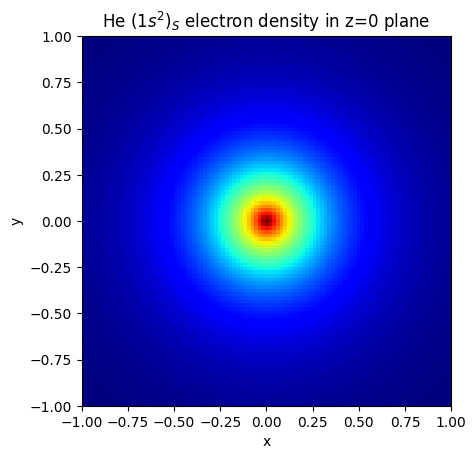

In [21]:
#plot electron density
zPlaneDensityPlot(-1,1,50,HeElec1s1s_S,GTOsHe,r"He $(1s^2)_S$")

### Exicited states of Helium

The Hartree-Fock algorithm can be applied to excited states by considering the case where electrons are in higher shells. However, as most basis sets are not optimised for this case results quickly diverge from experiment. Below, is the code used to deduce the first few excited states for Helium, the labelling of each shell was deduced from looking at the spin, the total energy and the symetries of the density plot of the corresponding shell. For a more accurate treatment via non-linear methods see (Branson, 2013). Because of the problems seen here, exicted states will not be considered for the rest of the notebook.

In [22]:
#this code was implemented with the 4ZaPa-NR-CV basis set
E1s2s_T, HeElec1s2s_T = iterateHF(ups, downs, repHe, EGuess, maxErrorHe, lambda s: takeLthExcitedSpin(s,2,0,"up"))
E1s2p_T, HeElec1s2p_T = iterateHF(ups, downs, repHe, EGuess, maxErrorHe, lambda s: takeLthExcitedSpin(s,2,1,"up"))
E1s2s_S, HeElec1s2s_S = iterateHF(ups, downs, repHe, EGuess, maxErrorHe, lambda s: takeLthExcitedSpin(s,2,1,"down"))
E1s2p_S, HeElec1s2p_S = iterateHF(ups, downs, repHe, EGuess, maxErrorHe, lambda s: takeLthExcitedSpin(s,2,2,"down"))

#this computation turned out to be very expensive, the values found are
E1s1s_S = -2.8616762236033466
E1s2s_T = -2.169773174025698
E1s2p_T = -1.985953243413748
E1s2s_S = -2.1668064584093205
E1s2p_S = -1.9638361735952967

#Note how spin degeneracy is broken by electron-electron interactions, also note that we only had to consider
# the placement of one electron for this level of exicted states.

### Contracted basis ground state

Here the contracted case is calculated for the same basis set. While the result is less accurate it is still reasonable, showing why contracted basis sets are useful for inefficient calculations.

In [23]:
#sets up contracted 3ZaPa-NR-CV Helium basis set
CGTOsHe = getGuassians("3ZaPa-NR-CV", 2, np.zeros(3), basisType="contracted")

#define representation class
repConHe = RepCGTO(CGTOsHe, ZsHe, nucPosHe)

#define intial guess
ups = repConHe.normaliseList([[1 for i in range(len(CGTOsHe))]])
downs = repConHe.normaliseList([[1 for i in range(len(CGTOsHe))]])
EGuess = -2.8

#run simulation and print energy
ECon1s1s_S, HeElectrons = iterateHF(ups,downs,repConHe,EGuess,maxErrorHe,lambda s: takeGroundEigStates(s,2))
print(f"Energy found with contracted basis set is: {ECon1s1s_S} Hartree, the experimental energy is -2.862 Hartree.")
print(f"The difference between the contracted and primitive cases is: {abs(ECon1s1s_S-E1s1s_S)} Hartree.")

Energy found with contracted basis set is: -2.7486702345273555 Hartree, the experimental energy is -2.862 Hartree.
The difference between the contracted and primitive cases is: 0.11300598907599113 Hartree.


## $H_2$ molecule

The following code considers the Hydrogen molecule. The equilibrium distance between the molecules is calculated by minimising the total energy of the system. This is the Ehrenfest approximation and is justified by (need to think about). The shell density is then graphed; as the system is in a singlet state the two densities have the same form, meaning only one density plot is graphed here. The 6-21G Pople type 2-zeta basis set is used for these calculations, it is taken from (MolSSI, 2020).

In [24]:
def findH2Ground(bondLength): 
    """
    Function that returns the ground state energy, electron states and GTOs for a given bound length
    """
    #defines simulation parameters and sets up 6-21G basis at each atom
    posH1 = np.array([-bondLength[0]/2, 0, 0])
    posH2 = np.array([bondLength[0]/2, 0, 0])
    GTOsH2 = getGuassians("6-21G", 1, posH1, basisType="primitive") + getGuassians("6-21G", 1, posH2, basisType="primitive")
    nucPosH2 = [posH1,posH2]
    ZsH2 = [1,1]
    maxErrorH2 = 1E-4

    #defines representation
    repH2 = Rep1sGTO(GTOsH2, ZsH2, nucPosH2)
    
    #defines intial guess
    ups = repH2.normaliseList([[1 for i in range(len(GTOsH2))]])
    downs = repH2.normaliseList([[1 for i in range(len(GTOsH2))]])
    EGuess = 0 

    #finds total molecular energy
    E_el, H2Electrons = iterateHF(ups, downs, repH2, EGuess, maxErrorH2, lambda s: takeGroundEigStates(s,2))
    E = 1/bondLength[0]

    #returns total molecular energy
    return E_el + E, H2Electrons, GTOsH2

def findH2GroundEnergy(bondLength):
    """
    Function that returns the ground state energy for a given bound length
    """
    E, H2Electrons, GTOsH2 = findH2Ground(bondLength)
    return E

#finds the min bound length a prints 
minBoundLength = fmin(findH2GroundEnergy,1.6)
print(f"Bound length: {minBoundLength} au, the experimental value is 1.401 au.")


Optimization terminated successfully.
         Current function value: -1.122965
         Iterations: 13
         Function evaluations: 26
Bound length: [1.38867188] au, the experimental value is 1.401 au.


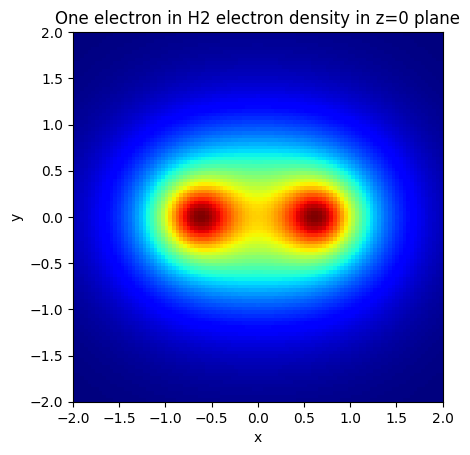

In [25]:
#finds ground state with correct bond length
EH2, H2Electrons, GTOsH2 = findH2Ground([1.3887])

#density plot of total electron density, a graph of the other wavefunction is identical
zPlaneDensityPlot(-2,2,50,[H2Electrons[0]],GTOsH2,"One electron in H2")
#note how electron is not localised to one state

## Li

This code finds the ground state energy of Li and looks at the different electron states. The basis used is Pople's 6-21G 2-zeta basis set, it has been taken from  (MolSSI, 2020).

In [26]:
#sets up 6-21G lithium basis set
GTOsLi = getGuassians("6-21G", 3, np.zeros(3), basisType="primitive")

#sets up simulation parameters
ZsLi = [3]
nucPosLi = [np.array([0,0,0])]
maxErrorLi = 1E-4

#sets up representation
repLi = RepGTO(GTOsLi, ZsLi, nucPosLi)

#sets up guess  
g = [1 for i in range(len(GTOsLi))]
ups = repLi.normaliseList([g])
downs = repLi.normaliseList([g,g])
EGuess = -7.5

#finds ground state and prints
E,LiElectrons = iterateHF(ups, downs, repLi, EGuess, maxErrorLi, lambda s: takeGroundEigStates(s,3))
print(f"Energy: {E} hartree, the experimental value is -7.479 hartree.")

Energy: -7.4312433097108554 hartree, the experimental value is -7.479 hartree.


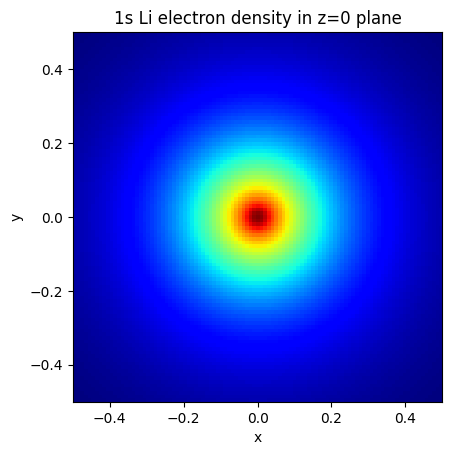

In [27]:
#all these states have the same structure as they are all in spherical states
zPlaneDensityPlot(-0.5,0.5,50,[LiElectrons[0]],GTOsLi,"1s Li")

### O

This code finds the ground state energy of O and looks at the different electron states. The basis used is Pople's 6-21G 2-zeta basis set, it has been taken from  (MolSSI, 2020).

In [32]:

#sets up 6-21G set for oxygen
GTOsO = getGuassians("6-21G", 8, np.zeros(3), basisType="primitive")

#sets up simulation parameters
ZsO = [8]
nucPosO = [np.array([0,0,0])]
maxErrorO = 1E-4

#sets up representation
repO = RepGTO(GTOsO, ZsO, nucPosO)

#sets up intial guess  
g =[1 for i in range(len(GTOsO))]
ups = repO.normaliseList([g,g,g,g])
downs = repO.normaliseList([g,g,g,g])
EGuess = 0

#finds energy and prints
EO, OElectrons = iterateHF(ups, downs, repO, EGuess, maxErrorO, lambda s: takeGroundEigStates(s,8))
print(f"Energy: {EO} hartree, the experimental value is -75.113 hartree.")

Energy: -74.5824793042213 hartree, the experimental value is -75.113 hartree.


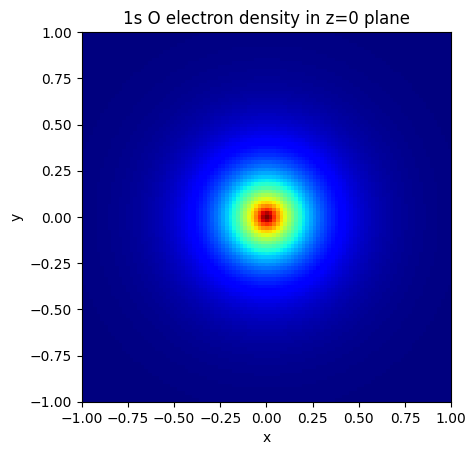

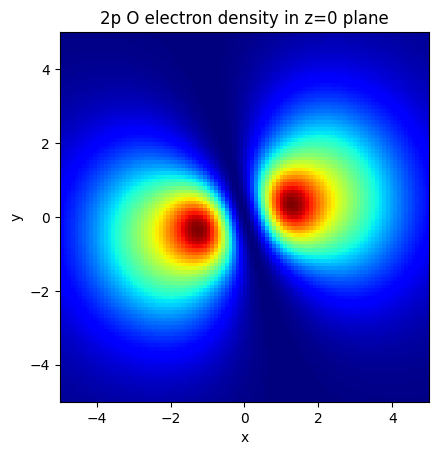

In [30]:
# this makes sense as the ground state should be 1s^2 2s^2 2p^4 (the change in axis also makes sense)
zPlaneDensityPlot(-1,1,50,[OElectrons[1]],GTOsLi,"1s O")
zPlaneDensityPlot(-5,5,50,[OElectrons[4]],GTOsLi,"2p O")


### $H_2O$ 

This code deduces the $H_2O$ angle and bound length via the same method used for the $H_2$ bond length. It then finds the ground state energy of $H_2O$ and looks at the different electron states. The basis used is Pople's 6-21G 2-zeta basis set, it has been taken from (MolSSI, 2020).

In [31]:
def findH20Ground(bondLength,theta):
    """"
    Function that finds the ground state of H2O given the boundLength and angle. 
    """
    #finds atom positions (O is set to the origin to make calculation more efficient)
    posH1 = np.array([bondLength,0,0])
    posH2 = np.array([bondLength*np.cos(theta),bondLength*np.sin(theta),0])
    posOx = np.array([0,0,0])

    GTOsH1 = getGuassians("6-21G", 1, posH1, basisType="primitive")
    GTOsH2 = getGuassians("6-21G", 1, posH2, basisType="primitive")
    GTOsH2O = GTOsO + GTOsH1 + GTOsH2

    #sets up simulation parameters
    Zs = [8,1,1]
    nucPos = [posOx,posH1,posH2]
    maxError = 1E-4

    #defines representation
    repH2O = RepGTO(GTOsH2O, Zs, nucPos)

    #defines guess
    g =[1 for i in range(len(GTOsH2O))]
    ups = repH2O.normaliseList([g,g,g,g,g])
    downs = repH2O.normaliseList([g,g,g,g,g])
    EGuess = 0

    #finds energy and returns 
    EH2O,H2OElectrons = iterateHF(ups, downs, repH2O, EGuess, maxError, lambda s: takeGroundEigStates(s,10))
    return EH2O, H2OElectrons, GTOsH2O

def findH2OGroundEnergy(params):
    """"
    Function that takes in a numpy array of [bound length,theta] and returns its energy.
    """
    bondLength = params[0]
    theta = params[1]
    EH2O, H2OElectrons, GTOsH2O = findH20Ground(bondLength,theta)
    return EH2O + + 16/bondLength + 1/(bondLength*np.sqrt(2-2*np.cos(theta)))


[boundLength,theta] = fmin(findH2OGroundEnergy, np.array([1.795,1.824]))
print(f"Bound length: {boundLength} au, the experimental value is 1.809 au.")
print(f"Theta: {180*theta/np.pi} degrees, the experimental value is 104.5 degrees.")

Optimization terminated successfully.
         Current function value: -75.896605
         Iterations: 24
         Function evaluations: 48
Bound length: 1.822429200831385 au, the experimental value is 1.809 au.
Theta: 107.3528752004348 degrees, the experimental value is 104.5 degrees.


In [51]:
#finds ground state with correct bond length
EH2O, H2OElectrons, GTOsH2O = findH20Ground(boundLength,theta)

print(f"Energy: {EH2O} hartree, the experimental value is (insert) hartree")

Energy: -85.01662487515375 hartree, the experimental value is (insert) hartree


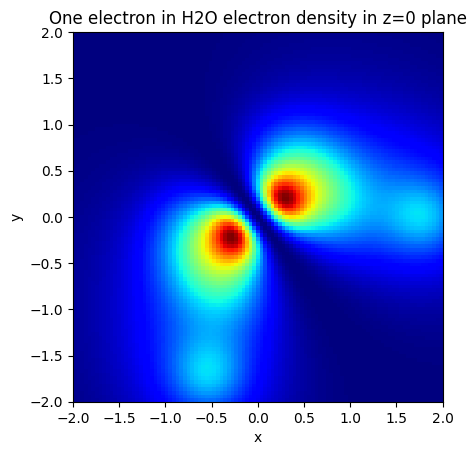

In [65]:
#density plot of total electron density, a graph of the other wavefunction is identical
zPlaneDensityPlot(-2,2,50,H2OElectrons[4:6],GTOsH2O,"One electron in H2O")
#need to look at this, are the electrons that weakly bound to hydrogen? the only terms that seem to contribute
# are 4:6 shells

## References

Thijseen J., 2013. Computational Physics. Cambridge: Cambridge University Press

Griffiths D., 2018. Introduction To Quantum Mechanics.  Cambridge: Cambridge University Press

Slater J., 1930. Atomic Shielding Constants. Physical Review: Volume 36

Goings, J., 2017. joshuagoings. [Online] 
Available at: https://joshuagoings.com/2017/04/28/integrals/
[Accessed 17 June 2024].

The Molecular Sciences Software Institute (MolSSI), V. T., 2020. Basis Set Exchange. [Online] 
Available at: https://www.basissetexchange.org/
[Accessed 17 June 2024].

Ditchfield, R., Hehre, W., & J.Pople. (1970). Self-Consistent Molecular Orbital Methods. VI. Energy Optimized. The Journal of Chemical Physics, 5001-5006.

Stewart, R. (1969). Small Gaussian Expansions of Slater-Type Orbitals . Tth Journal of Chemical Physics , 431-438.

Ditchfield, R., Hehre, W., & J.Pople. (1971). Self‐Consistent Molecular‐Orbital Methods. IX. An Extended. The Journal of Chemical Physics, 724-728.

Davidson, E., Feller D. (1986). Basis Set Selection for Molecular Calculations. Chem. Rev., 681-701.

Branson, J. (2013, April 22). The First Excited State(s). Retrieved from Physics 130A: https://quantummechanics.ucsd.edu/ph130a/130_notes/node374.html

Labanowski, J. (n.d.). ab initio Basis Sets. Retrieved from Libre Texts Chemistry: https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Supplemental_Modules_(Physical_and_Theoretical_Chemistry)/Quantum_Mechanics/17%3A_Quantum_Calculations/ab_initio_Basis_Sets

